In [145]:
import numpy as np
import pandas as pd
import textstat
import nltk
import re
from scipy.stats import bootstrap
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
News_df = pd.read_pickle('News_df.pkl')
News_df.reset_index(drop = True, inplace = True)
News_df

text  real      subject  \
0       Donald Trump just couldn t wish all Americans ...     0         None   
1       House Intelligence Committee Chairman Devin Nu...     0         None   
2       On Friday, it was revealed that former Milwauk...     0         None   
3       Pope Francis used his annual Christmas Day mes...     0         None   
4       The number of cases of cops brutalizing and ki...     0         None   
...                                                   ...   ...          ...   
128925  21st Century Wire says As 21WIRE reported earl...     0  Middle-east   
128926  21st Century Wire says It s a familiar theme. ...     0  Middle-east   
128927  Patrick Henningsen  21st Century WireRemember ...     0  Middle-east   
128928  21st Century Wire says Al Jazeera America will...     0  Middle-east   
128929  21st Century Wire says As 21WIRE predicted in ...     0  Middle-east   

                                                    title              date  
0                                                    None              None  
1                                                    None              None  
2                                                    None              None  
3                                                    None              None  
4                                                    None              None  
...                                                   ...               ...  
128925  McPain: John McCain Furious That Iran Treated ...  January 16, 2016  
128926  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...  January 16, 2016  
128927  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...  January 15, 2016  
128928  How to Blow $700 Million: Al Jazeera America F...  January 14, 2016  
128929  10 U.S. Navy Sailors Held by Iranian Military ...  January 12, 2016  

[128930 rows x 5 columns]

In [68]:
News_df["id"] = News_df.index + 1
News_df

text  real      subject  \
0       Donald Trump just couldn t wish all Americans ...     0         None   
1       House Intelligence Committee Chairman Devin Nu...     0         None   
2       On Friday, it was revealed that former Milwauk...     0         None   
3       Pope Francis used his annual Christmas Day mes...     0         None   
4       The number of cases of cops brutalizing and ki...     0         None   
...                                                   ...   ...          ...   
115644  21st Century Wire says As 21WIRE reported earl...     0  Middle-east   
115645  21st Century Wire says It s a familiar theme. ...     0  Middle-east   
115646  Patrick Henningsen  21st Century WireRemember ...     0  Middle-east   
115647  21st Century Wire says Al Jazeera America will...     0  Middle-east   
115648  21st Century Wire says As 21WIRE predicted in ...     0  Middle-east   

                                                    title              date  \
0                                                    None              None   
1                                                    None              None   
2                                                    None              None   
3                                                    None              None   
4                                                    None              None   
...                                                   ...               ...   
115644  McPain: John McCain Furious That Iran Treated ...  January 16, 2016   
115645  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...  January 16, 2016   
115646  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...  January 15, 2016   
115647  How to Blow $700 Million: Al Jazeera America F...  January 14, 2016   
115648  10 U.S. Navy Sailors Held by Iranian Military ...  January 12, 2016   

        fe_score  fk_score  cl_score  ari_score  dc_score  ...  \
0          71.14       7.6      9.05        9.8      8.20  ...   
1          62.78       8.7     11.95       11.6      9.86  ...   
2          63.59       8.4     11.02       11.0      8.74  ...   
3          67.08       9.1      8.59       10.5      8.10  ...   
4          68.60       8.5      8.53        9.8      8.10  ...   
...          ...       ...       ...        ...       ...  ...   
115644     44.98      13.5     12.42       15.9      9.83  ...   
115645     65.25       9.8      9.17       11.9      9.18  ...   
115646     51.62      13.0     11.15       16.0      8.53  ...   
115647     65.25       9.8     10.22       12.8      9.34  ...   
115648     61.06       9.4     10.62       11.3      8.76  ...   

        syllable_count  word_count  sentence_count char_count  letter_count  \
0                  692         492              29       2378          2257   
1                  471         305              18       1590          1551   
2                  845         579              36       2998          2852   
3                  574         420              20       1913          1873   
4                  423         312              16       1421          1387   
...                ...         ...             ...        ...           ...   
115644             838         522              20       2696          2649   
115645             427         297              13       1384          1340   
115646            6345        4164             149      20723         20189   
115647             649         456              20       2210          2140   
115648            1304         872              47       4347          4198   

        polysyllab_count  monosyllab_count  \
0                     59               362   
1                     39               193   
2                     73               415   
3                     34               313   
4                     25               235   
...                  ...               ...   
115644                94               331   
115645                34         

In [3]:
News_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128930 entries, 0 to 128929
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   text     128930 non-null  object
 1   real     128930 non-null  int64 
 2   subject  128930 non-null  object
 3   title    128930 non-null  object
 4   date     128930 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.9+ MB


In [4]:
News_df['text'][0][:500]

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a gr'

In [5]:
News_df.head()

text  real subject title  date
0  Donald Trump just couldn t wish all Americans ...     0    None  None  None
1  House Intelligence Committee Chairman Devin Nu...     0    None  None  None
2  On Friday, it was revealed that former Milwauk...     0    None  None  None
3  Pope Francis used his annual Christmas Day mes...     0    None  None  None
4  The number of cases of cops brutalizing and ki...     0    None  None  None

In [6]:
'''
Most English language reading scores avaliabe in textstat were used. One exception was SMOG, which requires more content 
than many of the articles had. 
'''

'\nMost English language reading scores avaliabe in textstat were used. One exception was SMOG, which requires more content \nthan many of the articles had. \n'

In [7]:
sc_scorers = [
    textstat.flesch_reading_ease, 
    textstat.flesch_kincaid_grade,
    textstat.coleman_liau_index,
    textstat.automated_readability_index,
    textstat.dale_chall_readability_score,
    textstat.difficult_words,
    textstat.linsear_write_formula,
    textstat.gunning_fog, 
    textstat.text_standard,
    textstat.syllable_count,
    textstat.lexicon_count,
    textstat.sentence_count,
    textstat.char_count,
    textstat.letter_count,
    textstat.polysyllabcount,
    textstat.monosyllabcount
    ]
len(sc_scorers)

16

In [81]:
column_names = [
    'fe_score', 
    'fk_score',
    'cl_score',
    'ari_score',
    'dc_score',
    'dw_score',
    'ls_score',
    'gf_score',
    'std_score',
    'syllable_count',
    'word_count',
    'sentence_count',
    'char_count',
    'letter_count',
    'polysyllab_count',
    'monosyllab_count'
    ]
len(column_names)

16

In [9]:
def newsscore(scorer, column_name):
    x = len(News_df)
    sclist = []
    for i in range(x):
            scvar = scorer(News_df['text'][i])
            sclist.append(scvar)
    News_df[column_name] = sclist


In [10]:
start_time = time.time()
y = len(column_names)
for i in range(y):
    newsscore(sc_scorers[i], column_names[i])
print("--- %s seconds ---" % (time.time() - start_time))

--- 2657.608556032181 seconds ---


In [11]:
News_df.head()

text  real subject title  \
0  Donald Trump just couldn t wish all Americans ...     0    None  None   
1  House Intelligence Committee Chairman Devin Nu...     0    None  None   
2  On Friday, it was revealed that former Milwauk...     0    None  None   
3  Pope Francis used his annual Christmas Day mes...     0    None  None   
4  The number of cases of cops brutalizing and ki...     0    None  None   

   date  fe_score  fk_score  cl_score  ari_score  dc_score  ...  ls_score  \
0  None     71.14       7.6      9.05        9.8      8.20  ...     11.80   
1  None     62.78       8.7     11.95       11.6      9.86  ...     12.40   
2  None     63.59       8.4     11.02       11.0      8.74  ...     14.75   
3  None     67.08       9.1      8.59       10.5      8.10  ...     12.20   
4  None     68.60       8.5      8.53        9.8      8.10  ...     11.60   

   gf_score            std_score syllable_count  word_count  sentence_count  \
0      8.91    8th and 9th grade            692         492              29   
1      9.91  11th and 12th grade            471         305              18   
2      9.20    8th and 9th grade            845         579              36   
3     10.97  10th and 11th grade            574         420              20   
4     10.24    8th and 9th grade            423         312              16   

   char_count  letter_count  polysyllab_count  monosyllab_count  
0        2378          2257                59               362  
1        1590          1551                39               193  
2        2998          2852                73               415  
3        1913          1873                34               313  
4        1421          1387                25               235  

[5 rows x 21 columns]

In [12]:
News_df['clean_text'] = News_df['text'].str.replace('[^a-zA-Z]',' ').str.lower()
News_df

C:\Users\danie\AppData\Local\Temp\ipykernel_16192\429811828.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  News_df['clean_text'] = News_df['text'].str.replace('[^a-zA-Z]',' ').str.lower()


text  real      subject  \
0       Donald Trump just couldn t wish all Americans ...     0         None   
1       House Intelligence Committee Chairman Devin Nu...     0         None   
2       On Friday, it was revealed that former Milwauk...     0         None   
3       Pope Francis used his annual Christmas Day mes...     0         None   
4       The number of cases of cops brutalizing and ki...     0         None   
...                                                   ...   ...          ...   
128925  21st Century Wire says As 21WIRE reported earl...     0  Middle-east   
128926  21st Century Wire says It s a familiar theme. ...     0  Middle-east   
128927  Patrick Henningsen  21st Century WireRemember ...     0  Middle-east   
128928  21st Century Wire says Al Jazeera America will...     0  Middle-east   
128929  21st Century Wire says As 21WIRE predicted in ...     0  Middle-east   

                                                    title              date  \
0                                                    None              None   
1                                                    None              None   
2                                                    None              None   
3                                                    None              None   
4                                                    None              None   
...                                                   ...               ...   
128925  McPain: John McCain Furious That Iran Treated ...  January 16, 2016   
128926  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...  January 16, 2016   
128927  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...  January 15, 2016   
128928  How to Blow $700 Million: Al Jazeera America F...  January 14, 2016   
128929  10 U.S. Navy Sailors Held by Iranian Military ...  January 12, 2016   

        fe_score  fk_score  cl_score  ari_score  dc_score  ...  gf_score  \
0          71.14       7.6      9.05        9.8      8.20  ...      8.91   
1          62.78       8.7     11.95       11.6      9.86  ...      9.91   
2          63.59       8.4     11.02       11.0      8.74  ...      9.20   
3          67.08       9.1      8.59       10.5      8.10  ...     10.97   
4          68.60       8.5      8.53        9.8      8.10  ...     10.24   
...          ...       ...       ...        ...       ...  ...       ...   
128925     44.98      13.5     12.42       15.9      9.83  ...     15.11   
128926     65.25       9.8      9.17       11.9      9.18  ...     12.35   
128927     51.62      13.0     11.15       16.0      8.53  ...     14.05   
128928     65.25       9.8     10.22       12.8      9.34  ...     11.31   
128929     61.06       9.4     10.62       11.3      8.76  ...     10.33   

                  std_score  syllable_count word_count  sentence_count  \
0         8th and 9th grade             692        492              29   
1       11th and 12th grade             471        305              18   
2         8th and 9th grade             845        579              36   
3       10th and 11th grade             574        420              20   
4         8th and 9th grade             423        312              16   
...                     ...             ...        ...             ...   
128925  15th and 16th grade             838        522              20   
128926   9th and 10th grade             427        297              13   
128927  15th and 16th grade            6345       4164             149   
128928   9th and 10th grade             649        456              20   
128929    8th and 9th grade            1304        872              47   

        char_count  letter_count  polysyllab_count  monosyllab_count  \
0             2378          2257                59               362   
1             1590          1551                39               193   
2             2998          2852                73               415   
3             1913          1873                34   

In [13]:
News_df['std_score'].unique()

array(['8th and 9th grade', '11th and 12th grade', '10th and 11th grade',
       '7th and 8th grade', '13th and 14th grade', '12th and 13th grade',
       '9th and 10th grade', '15th and 16th grade', '14th and 15th grade',
       '6th and 7th grade', '5th and 6th grade', '16th and 17th grade',
       '17th and 18th grade', '4th and 5th grade', '20th and 21st grade',
       '18th and 19th grade', '35th and 36th grade', '3rd and 4th grade',
       '19th and 20th grade', '-1th and 0th grade', '45th and 46th grade',
       '22nd and 23rd grade', '32nd and 33rd grade',
       '49th and 50th grade', '25th and 26th grade',
       '90th and 91st grade', '43rd and 44th grade', '1st and 2nd grade',
       '0th and 1st grade', '55th and 56th grade', '21st and 22nd grade',
       '23rd and 24th grade', '2nd and 3rd grade', '33rd and 34th grade',
       '71st and 72nd grade', '24th and 25th grade',
       '-3th and -2th grade', '38th and 39th grade',
       '114th and 115th grade', '291st and 292nd

In [14]:
x = len(News_df['std_score'])
num_list = []
for i in range(x):
    num = re.findall(r'\d+', News_df['std_score'][i])
    num_list.append(num)
len(num_list)

128930

In [15]:
fin_list = []
for i in num_list:
    x = int(i[0])
    y = int(i[1])
    fin = (x+y)/2
    fin_list.append(fin)
len(fin_list)

128930

In [16]:
News_df['std_score_num'] = fin_list
News_df.head()

text  real subject title  \
0  Donald Trump just couldn t wish all Americans ...     0    None  None   
1  House Intelligence Committee Chairman Devin Nu...     0    None  None   
2  On Friday, it was revealed that former Milwauk...     0    None  None   
3  Pope Francis used his annual Christmas Day mes...     0    None  None   
4  The number of cases of cops brutalizing and ki...     0    None  None   

   date  fe_score  fk_score  cl_score  ari_score  dc_score  ...  \
0  None     71.14       7.6      9.05        9.8      8.20  ...   
1  None     62.78       8.7     11.95       11.6      9.86  ...   
2  None     63.59       8.4     11.02       11.0      8.74  ...   
3  None     67.08       9.1      8.59       10.5      8.10  ...   
4  None     68.60       8.5      8.53        9.8      8.10  ...   

             std_score  syllable_count  word_count sentence_count  char_count  \
0    8th and 9th grade             692         492             29        2378   
1  11th and 12th grade             471         305             18        1590   
2    8th and 9th grade             845         579             36        2998   
3  10th and 11th grade             574         420             20        1913   
4    8th and 9th grade             423         312             16        1421   

   letter_count  polysyllab_count  monosyllab_count  \
0          2257                59               362   
1          1551                39               193   
2          2852                73               415   
3          1873                34               313   
4          1387                25               235   

                                          clean_text  std_score_num  
0  donald trump just couldn t wish all americans ...            8.5  
1  house intelligence committee chairman devin nu...           11.5  
2  on friday  it was revealed that former milwauk...            8.5  
3  pope francis used his annual christmas day mes...           10.5  
4  the number of cases of cops brutalizing and ki...            8.5  

[5 rows x 23 columns]

In [17]:
rslt_df1 = News_df[News_df['real'] == 1]
rslt_df1['std_score_num'].describe()

count    56363.000000
mean        11.821310
std          2.436246
min          0.500000
25%         10.500000
50%         11.500000
75%         13.500000
max         67.500000
Name: std_score_num, dtype: float64

In [18]:
rslt_df1['word_count'].describe()

count    56363.000000
mean       474.350762
std        477.113800
min          0.000000
25%        166.000000
50%        375.000000
75%        628.000000
max      14432.000000
Name: word_count, dtype: float64

In [19]:
rslt_wrd = News_df[News_df['word_count'] == 0]
rslt_wrd

text  real       subject  \
30220     🙂     0          None   
93002           1  politicsNews   
116372          0      politics   
116490          0      politics   
116639          0      politics   
...     ...   ...           ...   
127265          0     left-news   
127275          0     left-news   
127276          0     left-news   
127306          0     left-news   
127322          0     left-news   

                                                    title            date  \
30220                                                None            None   
93002                      Graphic: Supreme Court roundup  June 16, 2016    
116372  TAKE OUR POLL: Who Do You Think President Trum...    May 10, 2017   
116490  Joe Scarborough BERATES Mika Brzezinski Over “...    Apr 26, 2017   
116639  WATCH TUCKER CARLSON Scorch Sanctuary City May...     Apr 6, 2017   
...                                                   ...             ...   
127265  BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...    Apr 27, 2015   
127275  FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...    Apr 25, 2015   
127276  (VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...    Apr 25, 2015   
127306  (VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...    Apr 14, 2015   
127322  (VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...    Apr 12, 2015   

        fe_score  fk_score  cl_score  ari_score  dc_score  ...  \
30220     206.84     -15.7    -15.81        0.0       0.0  ...   
93002     206.84     -15.7    -15.81        0.0       0.0  ...   
116372    206.84     -15.7    -15.81        0.0       0.0  ...   
116490    206.84     -15.7    -15.81        0.0       0.0  ...   
116639    206.84     -15.7    -15.81        0.0       0.0  ...   
...          ...       ...       ...        ...       ...  ...   
127265    206.84     -15.7    -15.81        0.0       0.0  ...   
127275    206.84     -15.7    -15.81        0.0       0.0  ...   
127276    206.84     -15.7    -15.81        0.0       0.0  ...   
127306    206.84     -15.7    -15.81        0.0       0.0  ...   
127322    206.84     -15.7    -15.81        0.0       0.0  ...   

                 std_score  syllable_count  word_count sentence_count  \
30220   -1th and 0th grade               0           0              1   
93002   -1th and 0th grade               0           0              1   
116372  -1th and 0th grade               0           0              1   
116490  -1th and 0th grade               0           0              1   
116639  -1th and 0th grade               0           0              1   
...                    ...             ...         ...            ...   
127265  -1th and 0th grade               0           0              1   
127275  -1th and 0th grade               0           0              1   
127276  -1th and 0th grade               0           0              1   
127306  -1th and 0th grade               0           0              1   
127322  -1th and 0th grade               0           0              1   

        char_count  letter_count  polysyllab_count  monosyllab_count  \
30220            1             0                 0                 0   
93002            0             0                 0                 0   
116372           0             0                 0                 0   
116490           0             0                 0                 0   
116639           0             0                 0                 0   
...            ...           ...               ...               ...   
127265           0             0                 0                 0   
127275           0             0                 0                 0   
127276           0             0                 0                 0   
127306           0             0                 0                 0   
127322           0             0                 0                 0   

        clean_text  std_score_num  
30220                         0.5  
93002                         0.5  
116372            

In [27]:
News_df = News_df[News_df['word_count'] != 0]

News_df['word_count'].describe()

count    128298.000000
mean        431.300963
std         527.336972
min           1.000000
25%         122.000000
50%         339.000000
75%         539.000000
max       24135.000000
Name: word_count, dtype: float64

In [28]:
low_wrd = News_df[News_df['word_count']<40]
z = len(low_wrd)
low_wrd.reset_index(inplace = True, drop = True)
for i in range(z):
    print(low_wrd['text'][i])

There s not much to say here. GIPHY killed it with this one: When someone goes on a rant but you have receipts. https://t.co/axe58zCeJL #debatenight #Debates2016 pic.twitter.com/KTgdWAvaAb  GIPHY (@giphy) September 27, 2016Photo by Justin Sullivan/Getty Images
https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/
White House Press Secretary Sean Spicer appeared on Lou Dobbs tonight to give the first set of explanatory points around the President s decision to fire FBI Director James Comey:
White House Press Secretary Sean Spicer appeared on Lou Dobbs tonight to give the first set of explanatory points around the President s decision to fire FBI Director James Comey:
Enjoy:
Enjoy:
Enjoy:
Enjoy:
FOX NEWS ALERT: New details on @adamhousley s report; sources telling him the official who  unmasked  Trump associates is  very high up  pic.twitter.com/nowhUIIDSb  FOX & friends (@foxandfriends) April 3, 

In [ ]:
'''
These don't seem like great articles, not all are terrible, but the vast majority are, and thus I am going to set a first pass
minimum of 40 words. Also I need to take another look at duplicates. 
'''

In [29]:
News_df = News_df[News_df['word_count']>40]

In [30]:
News_df

text  real      subject  \
0       Donald Trump just couldn t wish all Americans ...     0         None   
1       House Intelligence Committee Chairman Devin Nu...     0         None   
2       On Friday, it was revealed that former Milwauk...     0         None   
3       Pope Francis used his annual Christmas Day mes...     0         None   
4       The number of cases of cops brutalizing and ki...     0         None   
...                                                   ...   ...          ...   
128925  21st Century Wire says As 21WIRE reported earl...     0  Middle-east   
128926  21st Century Wire says It s a familiar theme. ...     0  Middle-east   
128927  Patrick Henningsen  21st Century WireRemember ...     0  Middle-east   
128928  21st Century Wire says Al Jazeera America will...     0  Middle-east   
128929  21st Century Wire says As 21WIRE predicted in ...     0  Middle-east   

                                                    title              date  \
0                                                    None              None   
1                                                    None              None   
2                                                    None              None   
3                                                    None              None   
4                                                    None              None   
...                                                   ...               ...   
128925  McPain: John McCain Furious That Iran Treated ...  January 16, 2016   
128926  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...  January 16, 2016   
128927  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...  January 15, 2016   
128928  How to Blow $700 Million: Al Jazeera America F...  January 14, 2016   
128929  10 U.S. Navy Sailors Held by Iranian Military ...  January 12, 2016   

        fe_score  fk_score  cl_score  ari_score  dc_score  ...  \
0          71.14       7.6      9.05        9.8      8.20  ...   
1          62.78       8.7     11.95       11.6      9.86  ...   
2          63.59       8.4     11.02       11.0      8.74  ...   
3          67.08       9.1      8.59       10.5      8.10  ...   
4          68.60       8.5      8.53        9.8      8.10  ...   
...          ...       ...       ...        ...       ...  ...   
128925     44.98      13.5     12.42       15.9      9.83  ...   
128926     65.25       9.8      9.17       11.9      9.18  ...   
128927     51.62      13.0     11.15       16.0      8.53  ...   
128928     65.25       9.8     10.22       12.8      9.34  ...   
128929     61.06       9.4     10.62       11.3      8.76  ...   

                  std_score  syllable_count  word_count sentence_count  \
0         8th and 9th grade             692         492             29   
1       11th and 12th grade             471         305             18   
2         8th and 9th grade             845         579             36   
3       10th and 11th grade             574         420             20   
4         8th and 9th grade             423         312             16   
...                     ...             ...         ...            ...   
128925  15th and 16th grade             838         522             20   
128926   9th and 10th grade             427         297             13   
128927  15th and 16th grade            6345        4164            149   
128928   9th and 10th grade             649         456             20   
128929    8th and 9th grade            1304         872             47   

        char_count  letter_count  polysyllab_count  monosyllab_count  \
0             2378          2257                59               362   
1             1590          1551                39               193   
2             2998          2852                73               415   
3             1913          1873                34               313   
4             1421          1387                25               235   
...            ...           

In [ ]:
'''
Going to look at this again for articles with under 60 but greater than 40. These seem fine so I like the cutoff. I still have 
to do something about these duplicates though
'''

In [32]:
low_wrd2 = News_df[News_df['word_count']<60]
z = len(low_wrd2)
low_wrd2.reset_index(inplace = True, drop = True)
for i in range(z):
    print(low_wrd2['text'][i])

CNN Reports   Three members of the legal team known to have been hired so far by special counsel Robert Mueller to handle the Russia investigation have given political donations almost exclusively to Democrats, according to a CNN analysis of Federal Election Commission records.
CNN Reports   Three members of the legal team known to have been hired so far by special counsel Robert Mueller to handle the Russia investigation have given political donations almost exclusively to Democrats, according to a CNN analysis of Federal Election Commission records.
Hillary Clinton continues on the path to complete and total denial. #CODECON 2017 included a blah, blah, blah session by Clinton. She spews ridiculous victimhood it s embarrassing!  Nobody said don t do this https://www.youtube.com/watch?v=9_nKOL4h0iUThis woman needs to go off into the woods for another walk.
Alan Dershowitz schools his former student Jeffrey Tobin on whether the subject matter is a crime in relation to Jared Kushner: I d

In [60]:
News_df['word_count'].value_counts()

            

60      666
56      490
84      481
52      386
67      338
       ... 
1920      1
3556      1
2823      1
5049      1
3909      1
Name: word_count, Length: 2846, dtype: int64

In [61]:
News_df['sentence_count'].value_counts()

3      5456
4      4909
16     3817
14     3802
15     3757
       ... 
222       1
520       1
207       1
474       1
315       1
Name: sentence_count, Length: 351, dtype: int64

In [55]:
News_df['sentence_count'].min()

1

In [123]:

more_columns = ['real','subject','title','date']
mo_column_names = column_names + more_columns
print(mo_column_names)
check = News_df[News_df.duplicated(subset=mo_column_names, keep = False)]
check

['fe_score', 'fk_score', 'cl_score', 'ari_score', 'dc_score', 'dw_score', 'ls_score', 'gf_score', 'std_score', 'syllable_count', 'word_count', 'sentence_count', 'char_count', 'letter_count', 'polysyllab_count', 'monosyllab_count', 'real', 'subject', 'title', 'date']


text  real    subject  \
7742    Barbra Streisand was an Obama sycophant and on...     0       None   
7743    Barbra Streisand was an Obama sycophant and on...     0       None   
7744    Everyone suspected the sketchy Steele Dossier ...     0       None   
7745    Everyone suspected the sketchy Steele Dossier ...     0       None   
7746    It s been said that good fences make good neig...     0       None   
...                                                   ...   ...        ...   
105259   Who is silencing political speech, physically...     0   politics   
107869  They were probably just looking for a  safe sp...     0   politics   
107870  They were probably just looking for a  safe sp...     0   politics   
111235  In its 109-year history, only one F.B.I. direc...     0  left-news   
111238  In its 109-year history, only one F.B.I. direc...     0  left-news   

                                                    title          date  \
7742                                                 None          None   
7743                                                 None          None   
7744                                                 None          None   
7745                                                 None          None   
7746                                                 None          None   
...                                                   ...           ...   
105259  FORMER DEMOCRAT WARNS Young Americans: “Rioter...  Mar 10, 2017   
107869  [VIDEO] #BlackLivesMatter Terrorists Storm Dar...  Nov 16, 2015   
107870  [VIDEO] #BlackLivesMatter Terrorists Storm Dar...  Nov 16, 2015   
111235  MEDIA IGNORES Time That Bill Clinton FIRED His...  May 10, 2017   
111238  MEDIA IGNORES Time That Bill Clinton FIRED His...  May 10, 2017   

        fe_score  fk_score  cl_score  ari_score  dc_score  ...  \
7742       56.86       8.9     12.93       12.1      9.65  ...   
7743       56.86       8.9     12.93       12.1      9.65  ...   
7744       47.22      12.6     13.23       15.6      8.66  ...   
7745       47.22      12.6     13.23       15.6      8.66  ...   
7746       63.90       8.3     10.90       10.6      8.17  ...   
...          ...       ...       ...        ...       ...  ...   
105259     49.72       9.6     11.06        9.4      8.75  ...   
107869     64.71       8.0     10.95       10.2      8.94  ...   
107870     64.71       8.0     10.95       10.2      8.94  ...   
111235     61.87       9.1     10.50       10.9      8.07  ...   
111238     61.87       9.1     10.50       10.9      8.07  ...   

        syllable_count  word_count  sentence_count char_count  letter_count  \
7742               530         331              23       1854          1759   
7743               530         331              23       1854          1759   
7744              2437        1528              64       8151          7954   
7745              2437        1528              64       8151          7954   
7746               764         505              32       2592          2481   
...                ...         ...             ...        ...           ...   
105259             153          92               7        475           464   
107869             342         225              15       1151          1118   
107870             342         225              15       1151          1118   
111235            2717        1795             101       8929          8684   
111238            2717        1795             101       8929          8684   

        polysyllab_count  monosyllab_count  \
7742                  49               210   
7743                  49               210   
7744                 244               978   
7745                 244               978   
7746                  64               348   
...                  ...               ...   
105259                18                59   
107869                30               147   
107870                30               147   
111235       

In [91]:
check.reset_index(drop = True, inplace = True)
check[mo_column_names]
#dups = []
#x = len(check)
#for i in range(x):
    #for j in range(x):
        #if check[mo_column_names][i] == check[mo_column_names][j] and i != j:
            #print(j)
            #print(check['id'][i], check['id'][j])
            #dups.append((check['id'][i], check['id'][j]))
            

fe_score  fk_score  cl_score  ari_score  dc_score  dw_score   ls_score  \
0         56.86       8.9     12.93       12.1      9.65        74   8.571429   
1         56.86       8.9     12.93       12.1      9.65        74   8.571429   
2         47.22      12.6     13.23       15.6      8.66       264  16.500000   
3         47.22      12.6     13.23       15.6      8.66       264  16.500000   
4         63.90       8.3     10.90       10.6      8.17        70   5.888889   
...         ...       ...       ...        ...       ...       ...        ...   
19753     49.72       9.6     11.06        9.4      8.75        21   8.142857   
19754     64.71       8.0     10.95       10.2      8.94        44   8.714286   
19755     64.71       8.0     10.95       10.2      8.94        44   8.714286   
19756     61.87       9.1     10.50       10.9      8.07       271   7.125000   
19757     61.87       9.1     10.50       10.9      8.07       271   7.125000   

       gf_score            std_score  syllable_count  word_count  \
0          8.54    8th and 9th grade             530         331   
1          8.54    8th and 9th grade             530         331   
2         13.09  12th and 13th grade            2437        1528   
3         13.09  12th and 13th grade            2437        1528   
4          8.70    8th and 9th grade             764         505   
...         ...                  ...             ...         ...   
19753     11.33    8th and 9th grade             153          92   
19754      9.73    8th and 9th grade             342         225   
19755      9.73    8th and 9th grade             342         225   
19756      9.97  10th and 11th grade            2717        1795   
19757      9.97  10th and 11th grade            2717        1795   

       sentence_count  char_count  letter_count  polysyllab_count  \
0                  23        1854          1759                49   
1                  23        1854          1759                49   
2                  64        8151          7954               244   
3                  64        8151          7954               244   
4                  32        2592          2481                64   
...               ...         ...           ...               ...   
19753               7         475           464                18   
19754              15        1151          1118                30   
19755              15        1151          1118                30   
19756             101        8929          8684               226   
19757             101        8929          8684               226   

       monosyllab_count  real    subject  \
0                   210     0       None   
1                   210     0       None   
2                   978     0       None   
3                   978     0       None   
4                   348     0       None   
...                 ...   ...        ...   
19753                59     0   politics   
19754               147     0   politics   
19755               147     0   politics   
19756              1196     0  left-news   
19757              1196     0  left-news   

                                                   title          date  
0                                                   None          None  
1                                                   None          None  
2                                                   None          None  
3                                                   None          None  
4                                                   None          None  
...                                                  ...           ...  
19753  FORMER DEMOCRAT WARNS Young Americans: “Rioter...  Mar 10, 2017  
19754  [VIDEO] #BlackLivesMatter Terrorists Storm Dar...  Nov 16, 2015  
19755  [VIDEO] #BlackLivesMatter Terrorists Storm Dar...  Nov 16, 2015  
19756  MEDIA IGNORES Time That Bill Clinton FIRED His...  May 10, 2017  
19757  MEDIA IGNORES Time That Bill Clinton FIRED His...

In [93]:
check.head(30)

text  real subject title  \
0   Barbra Streisand was an Obama sycophant and on...     0    None  None   
1   Barbra Streisand was an Obama sycophant and on...     0    None  None   
2   Everyone suspected the sketchy Steele Dossier ...     0    None  None   
3   Everyone suspected the sketchy Steele Dossier ...     0    None  None   
4   It s been said that good fences make good neig...     0    None  None   
5   It s been said that good fences make good neig...     0    None  None   
6   Friday on MSNBC, climate activist Bill Nye war...     0    None  None   
7   Friday on MSNBC, climate activist Bill Nye war...     0    None  None   
8   #JokeNewsAfter record, cold temperatures were ...     0    None  None   
9   #JokeNewsAfter record, cold temperatures were ...     0    None  None   
10  A week after President Trump endorsed Ron DeSa...     0    None  None   
11  A week after President Trump endorsed Ron DeSa...     0    None  None   
12  The video below is one of the highlights from ...     0    None  None   
13  The video below is one of the highlights from ...     0    None  None   
14  Thanks to the persistence of Judicial Watch, t...     0    None  None   
15  Thanks to the persistence of Judicial Watch, t...     0    None  None   
16  Hell has frozen over! CNN is actually reportin...     0    None  None   
17  Hell has frozen over! CNN is actually reportin...     0    None  None   
18  AP News  The regulars amble in before dawn and...     0    None  None   
19  AP News  The regulars amble in before dawn and...     0    None  None   
20  AP News  The regulars amble in before dawn and...     0    None  None   
21  AP News  The regulars amble in before dawn and...     0    None  None   
22  Please see our previous report below on the Mc...     0    None  None   
23  Please see our previous report below on the Mc...     0    None  None   
24  Jenna Fischer is best known for playing the ve...     0    None  None   
25  Jenna Fischer is best known for playing the ve...     0    None  None   
26  According to The Sun, George W. Bush  successo...     0    None  None   
27  According to The Sun, George W. Bush  successo...     0    None  None   
28  Israel s transportation minister is pushing ah...     0    None  None   
29  Israel s transportation minister is pushing ah...     0    None  None   

    date  fe_score  fk_score  cl_score  ari_score  dc_score  ...  \
0   None     56.86       8.9     12.93       12.1      9.65  ...   
1   None     56.86       8.9     12.93       12.1      9.65  ...   
2   None     47.22      12.6     13.23       15.6      8.66  ...   
3   None     47.22      12.6     13.23       15.6      8.66  ...   
4   None     63.90       8.3     10.90       10.6      8.17  ...   
5   None     63.90       8.3     10.90       10.6      8.17  ...   
6   None     49.04      11.9     12.07       14.0      8.93  ...   
7   None     49.04      11.9     12.07       14.0      8.93  ...   
8   None     58.52      10.3     11.89       13.8      8.45  ...   
9   None     58.52      10.3     11.89       13.8      8.45  ...   
10  None     38.15      14.0     13.58       16.4      9.38  ...   
11  None     38.15      14.0     13.58       16.4      9.38  ...   
12  None     68.06       6.7      8.85        7.3      8.97  ...   
13  None     68.06       6.7      8.85        7.3      8.97  ...   
14  None     44.14      11.7     14.21       14.4      9.30  ...   
15  None     44.14      11.7     14.21       14.4      9.30  ...   
16  None     80.92       5.9      7.25        7.2      8.24  ...   
17  None     80.92       5.9      7.25        7.2      8.24  ...   
18  None     66.98       9.2      8.82       10.9      8.38  ...   
19  None     66.98       9.2      8.82       10.9      8.38  ...   
20  None     66.98       9.2      8.82       10.9      8.38  ...   
21  None     66.98       9.2      8.82       10.9      8.38  ...   
22  None     57.71      10.7     11.95       13.7      9.05  ...   
23  None     57.71      10.7 

In [94]:
check.tail(30)

text  real    subject  \
19728  ERBIL/SULAIMANIYA, Iraq (Reuters) - Kurds vote...     1  worldnews   
19729  ERBIL/SULAIMANIYA, Iraq (Reuters) - Kurds vote...     1  worldnews   
19730  ANKARA/BAGHDAD (Reuters) - Turkish tanks carri...     1  worldnews   
19731  ANKARA/BAGHDAD (Reuters) - Turkish tanks carri...     1  worldnews   
19732  ASTANA (Reuters) - Russia, Turkey and Iran are...     1  worldnews   
19733  ASTANA (Reuters) - Russia, Turkey and Iran are...     1  worldnews   
19734  SEOUL (Reuters) - South Korean Foreign Ministe...     1  worldnews   
19735  SEOUL (Reuters) - South Korean Foreign Ministe...     1  worldnews   
19736  WASHINGTON (Reuters) - President Donald Trump ...     1  worldnews   
19737  WASHINGTON (Reuters) - President Donald Trump ...     1  worldnews   
19738  PARIS (Reuters) - French President Emmanuel Ma...     1  worldnews   
19739  PARIS (Reuters) - French President Emmanuel Ma...     1  worldnews   
19740  GUATEMALA CITY (Reuters) - Guatemala s top cou...     1  worldnews   
19741  GUATEMALA CITY (Reuters) - Guatemala s top cou...     1  worldnews   
19742  PARIS (Reuters) - Europe s  big four  continen...     1  worldnews   
19743  PARIS (Reuters) - Europe s  big four  continen...     1  worldnews   
19744  BANGKOK (Reuters) - Ousted Thai prime minister...     1  worldnews   
19745  BANGKOK (Reuters) - Ousted Thai prime minister...     1  worldnews   
19746  GENEVA (Reuters) - North Korea and the United ...     1  worldnews   
19747  GENEVA (Reuters) - North Korea and the United ...     1  worldnews   
19748  No time to waste   we've got to fight with eve...     0   politics   
19749  No time to waste   we've got to fight with eve...     0   politics   
19750  In its 109-year history, only one F.B.I. direc...     0   politics   
19751  In its 109-year history, only one F.B.I. direc...     0   politics   
19752   Who is silencing political speech, physically...     0   politics   
19753   Who is silencing political speech, physically...     0   politics   
19754  They were probably just looking for a  safe sp...     0   politics   
19755  They were probably just looking for a  safe sp...     0   politics   
19756  In its 109-year history, only one F.B.I. direc...     0  left-news   
19757  In its 109-year history, only one F.B.I. direc...     0  left-news   

                                                   title                 date  \
19728  Turnout high as Iraqi Kurds defy threats to ho...  September 25, 2017    
19729  Turnout high as Iraqi Kurds defy threats to ho...  September 25, 2017    
19730  Turkish tanks drill on Iraqi border week befor...  September 18, 2017    
19731  Turkish tanks drill on Iraqi border week befor...  September 18, 2017    
19732  Russia says close to Syria deal with Turkey, Iran  September 14, 2017    
19733  Russia says close to Syria deal with Turkey, Iran  September 14, 2017    
19734  South Korean foreign minister says North Korea...  September 11, 2017    
19735  South Korean foreign minister says North Korea...  September 11, 2017    
19736  Trump, advisers craft more orderly response to...   September 4, 2017    
19737  Trump, advisers craft more orderly response to...   September 4, 2017    
19738  France unveils labor reforms in first step to ...     August 31, 2017    
19739  France unveils labor reforms in first step to ...     August 31, 2017    
19740  Guatemala top court sides with U.N. graft unit...     August 29, 2017    
19741  Guatemala top court sides with U.N. graft unit...     August 29, 2017    
19742  Europeans, Africans agree renewed push to tack...     August 28, 2017    
19743  Europeans, Africans agree renewed push to tack...     August 28, 2017    
19744  Thailand's ousted PM Yingluck has fled abroad:...     August 25, 2017    
19745  Thailand's ousted PM Yingluck has fled abroad:...     August 25, 2017    
19746  U.S., North Korea clash at U.N. forum over nuc...     August 22, 2017    
19747  U.S., North Korea clash at U.N. forum

In [111]:
check1 = News_df[News_df.duplicated(subset=column_names, keep = False)]
check1.reset_index(drop = True, inplace = True)
check1 = check.sort_values(column_names)
print(column_names)
check1


['fe_score', 'fk_score', 'cl_score', 'ari_score', 'dc_score', 'dw_score', 'ls_score', 'gf_score', 'std_score', 'syllable_count', 'word_count', 'sentence_count', 'char_count', 'letter_count', 'polysyllab_count', 'monosyllab_count']


text  real subject title  \
11708  How to contact WikiLeaks? What is Tor? Tips fo...     0    None  None   
11709  How to contact WikiLeaks? What is Tor? Tips fo...     0    None  None   
11710  How to contact WikiLeaks? What is Tor? Tips fo...     0    None  None   
11711  How to contact WikiLeaks? What is Tor? Tips fo...     0    None  None   
7798   High school kids out of control? Noooo! We ve ...     0    None  None   
...                                                  ...   ...     ...   ...   
11402  Hollyjood strikes again ! Quoting: Buck Bundy ...     0    None  None   
4796   Megyn:  What about Tim Allen? You re one of th...     0    None  None   
4797   Megyn:  What about Tim Allen? You re one of th...     0    None  None   
17638  Ukraine would sell even its nuclear bomb if th...     0    None  None   
19293  Ukraine would sell even its nuclear bomb if th...     0    None  None   

       date  fe_score  fk_score  cl_score  ari_score  dc_score  ...  \
11708  None   -520.76      96.3    256.56      227.8     40.06  ...   
11709  None   -520.76      96.3    256.56      227.8     40.06  ...   
11710  None   -520.76      96.3    256.56      227.8     40.06  ...   
11711  None   -520.76      96.3    256.56      227.8     40.06  ...   
7798   None    -82.61      27.3     71.55       59.2     11.02  ...   
...     ...       ...       ...       ...        ...       ...  ...   
11402  None     93.54       3.1      7.58        6.3      9.28  ...   
4796   None     93.74       3.0      3.40        2.9      7.28  ...   
4797   None     93.74       3.0      3.40        2.9      7.28  ...   
17638  None     96.82       3.9      5.86        6.6      7.62  ...   
19293  None     96.82       3.9      5.86        6.6      7.62  ...   

       syllable_count  word_count  sentence_count char_count  letter_count  \
11708            1011         125               3       6062          5883   
11709            1011         125               3       6062          5883   
11710            1011         125               3       6062          5883   
11711            1011         125               3       6062          5883   
7798              330         101              10       1620          1573   
...               ...         ...             ...        ...           ...   
11402             101          81               7        377           364   
4796              198         159              14        631           599   
4797              198         159              14        631           599   
17638              57          50               3        209           202   
19293              57          50               3        209           202   

       polysyllab_count  monosyllab_count  \
11708                95                24   
11709                95                24   
11710                95                24   
11711                95                24   
7798                 16                65   
...                 ...               ...   
11402                 4                66   
4796                  9               134   
4797                  9               134   
17638                 2                45   
19293                 2                45   

                                              clean_text  std_score_num     id  
11708  how to contact wikileaks  what is tor  tips fo...          256.5  24770  
11709  how to contact wikileaks  what is tor  tips fo...          256.5  24771  
11710  how to contact wikileaks  what is tor  tips fo...          256.5  24772  
11711  how to contact wikileaks  what is tor  tips fo...          256.5  24773  
7798   high school kids out of control  noooo  we ve ...           10.5  17424  
...                                                  ...            ...    ...  
11402  hollyjood strikes again   quoting  buck bundy ...            5.5  24065  
4796   megyn   what about tim allen  you re one of th...            2.5  13617  
4797   megyn   what about tim a

In [108]:
check1.head(100)

text  real subject title  \
11708  How to contact WikiLeaks? What is Tor? Tips fo...     0    None  None   
11709  How to contact WikiLeaks? What is Tor? Tips fo...     0    None  None   
11710  How to contact WikiLeaks? What is Tor? Tips fo...     0    None  None   
11711  How to contact WikiLeaks? What is Tor? Tips fo...     0    None  None   
7798   High school kids out of control? Noooo! We ve ...     0    None  None   
...                                                  ...   ...     ...   ...   
14846  The Hayat Tahrir al-Sham terrorist group, toge...     0    None  None   
14847  The Hayat Tahrir al-Sham terrorist group, toge...     0    None  None   
14848  The Hayat Tahrir al-Sham terrorist group, toge...     0    None  None   
14849  The Hayat Tahrir al-Sham terrorist group, toge...     0    None  None   
18107  The United States has failed to uphold a promi...     0    None  None   

       date  fe_score  fk_score  cl_score  ari_score  dc_score  ...  \
11708  None   -520.76      96.3    256.56      227.8     40.06  ...   
11709  None   -520.76      96.3    256.56      227.8     40.06  ...   
11710  None   -520.76      96.3    256.56      227.8     40.06  ...   
11711  None   -520.76      96.3    256.56      227.8     40.06  ...   
7798   None    -82.61      27.3     71.55       59.2     11.02  ...   
...     ...       ...       ...       ...        ...       ...  ...   
14846  None      4.48      22.8     18.93       28.2     13.76  ...   
14847  None      4.48      22.8     18.93       28.2     13.76  ...   
14848  None      4.48      22.8     18.93       28.2     13.76  ...   
14849  None      4.48      22.8     18.93       28.2     13.76  ...   
18107  None      5.50      28.6     13.07       35.4     11.72  ...   

       syllable_count  word_count  sentence_count char_count  letter_count  \
11708            1011         125               3       6062          5883   
11709            1011         125               3       6062          5883   
11710            1011         125               3       6062          5883   
11711            1011         125               3       6062          5883   
7798              330         101              10       1620          1573   
...               ...         ...             ...        ...           ...   
14846             155          82               2        507           499   
14847             155          82               2        507           499   
14848             155          82               2        507           499   
14849             155          82               2        507           499   
18107             105          65               1        336           330   

       polysyllab_count  monosyllab_count  \
11708                95                24   
11709                95                24   
11710                95                24   
11711                95                24   
7798                 16                65   
...                 ...               ...   
14846                20                43   
14847                20                43   
14848                20                43   
14849                20                43   
18107                 8                38   

                                              clean_text  std_score_num     id  
11708  how to contact wikileaks  what is tor  tips fo...          256.5  24770  
11709  how to contact wikileaks  what is tor  tips fo...          256.5  24771  
11710  how to contact wikileaks  what is tor  tips fo...          256.5  24772  
11711  how to contact wikileaks  what is tor  tips fo...          256.5  24773  
7798   high school kids out of control  noooo  we ve ...           10.5  17424  
...                                                  ...            ...    ...  
14846  the hayat tahrir al sham terrorist group  toge...           22.5  32861  
14847  the hayat tahrir al sham terrorist group  toge...           22.5  32862  
14848  the hayat tahrir al sham

In [121]:
check.duplicated(subset=mo_column_names, keep = 'last')
check

Empty DataFrame
Columns: [text, real, subject, title, date, fe_score, fk_score, cl_score, ari_score, dc_score, dw_score, ls_score, gf_score, std_score, syllable_count, word_count, sentence_count, char_count, letter_count, polysyllab_count, monosyllab_count, clean_text, std_score_num, id]
Index: []

[0 rows x 24 columns]

In [124]:
check = check.drop_duplicates(subset=column_names, keep='last')
check

text  real    subject  \
7743    Barbra Streisand was an Obama sycophant and on...     0       None   
7745    Everyone suspected the sketchy Steele Dossier ...     0       None   
7747    It s been said that good fences make good neig...     0       None   
7750    Friday on MSNBC, climate activist Bill Nye war...     0       None   
7753    #JokeNewsAfter record, cold temperatures were ...     0       None   
...                                                   ...   ...        ...   
93895   GENEVA (Reuters) - North Korea and the United ...     1  worldnews   
103845  No time to waste   we've got to fight with eve...     0   politics   
105259   Who is silencing political speech, physically...     0   politics   
107870  They were probably just looking for a  safe sp...     0   politics   
111238  In its 109-year history, only one F.B.I. direc...     0  left-news   

                                                    title              date  \
7743                                                 None              None   
7745                                                 None              None   
7747                                                 None              None   
7750                                                 None              None   
7753                                                 None              None   
...                                                   ...               ...   
93895   U.S., North Korea clash at U.N. forum over nuc...  August 22, 2017    
103845  HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...       Sep 9, 2017   
105259  FORMER DEMOCRAT WARNS Young Americans: “Rioter...      Mar 10, 2017   
107870  [VIDEO] #BlackLivesMatter Terrorists Storm Dar...      Nov 16, 2015   
111238  MEDIA IGNORES Time That Bill Clinton FIRED His...      May 10, 2017   

        fe_score  fk_score  cl_score  ari_score  dc_score  ...  \
7743       56.86       8.9     12.93       12.1      9.65  ...   
7745       47.22      12.6     13.23       15.6      8.66  ...   
7747       63.90       8.3     10.90       10.6      8.17  ...   
7750       49.04      11.9     12.07       14.0      8.93  ...   
7753       58.52      10.3     11.89       13.8      8.45  ...   
...          ...       ...       ...        ...       ...  ...   
93895      51.68      10.9     11.31       12.3      8.92  ...   
103845     65.76       9.6      9.58       12.0      7.99  ...   
105259     49.72       9.6     11.06        9.4      8.75  ...   
107870     64.71       8.0     10.95       10.2      8.94  ...   
111238     61.87       9.1     10.50       10.9      8.07  ...   

        syllable_count  word_count  sentence_count char_count  letter_count  \
7743               530         331              23       1854          1759   
7745              2437        1528              64       8151          7954   
7747               764         505              32       2592          2481   
7750              1773        1106              50       5734          5594   
7753              1199         801              38       4203          4031   
...                ...         ...             ...        ...           ...   
93895             1102         703              36       3571          3467   
103845             461         335              15       1585          1534   
105259             153          92               7        475           464   
107870             342         225              15       1151          1118   
111238            2717        1795             101       8929          8684   

        polysyllab_count  monosyllab_count  \
7743                  49               210   
7745                 244               978   
7747                  64               348   
7750                 173               691   
7753                  87               526   
...                  ...               ...   
93895                110               450   
103845                35               254   
105259     

In [125]:
News_df

text  real      subject  \
0       Donald Trump just couldn t wish all Americans ...     0         None   
1       House Intelligence Committee Chairman Devin Nu...     0         None   
2       On Friday, it was revealed that former Milwauk...     0         None   
3       Pope Francis used his annual Christmas Day mes...     0         None   
4       The number of cases of cops brutalizing and ki...     0         None   
...                                                   ...   ...          ...   
115644  21st Century Wire says As 21WIRE reported earl...     0  Middle-east   
115645  21st Century Wire says It s a familiar theme. ...     0  Middle-east   
115646  Patrick Henningsen  21st Century WireRemember ...     0  Middle-east   
115647  21st Century Wire says Al Jazeera America will...     0  Middle-east   
115648  21st Century Wire says As 21WIRE predicted in ...     0  Middle-east   

                                                    title              date  \
0                                                    None              None   
1                                                    None              None   
2                                                    None              None   
3                                                    None              None   
4                                                    None              None   
...                                                   ...               ...   
115644  McPain: John McCain Furious That Iran Treated ...  January 16, 2016   
115645  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...  January 16, 2016   
115646  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...  January 15, 2016   
115647  How to Blow $700 Million: Al Jazeera America F...  January 14, 2016   
115648  10 U.S. Navy Sailors Held by Iranian Military ...  January 12, 2016   

        fe_score  fk_score  cl_score  ari_score  dc_score  ...  \
0          71.14       7.6      9.05        9.8      8.20  ...   
1          62.78       8.7     11.95       11.6      9.86  ...   
2          63.59       8.4     11.02       11.0      8.74  ...   
3          67.08       9.1      8.59       10.5      8.10  ...   
4          68.60       8.5      8.53        9.8      8.10  ...   
...          ...       ...       ...        ...       ...  ...   
115644     44.98      13.5     12.42       15.9      9.83  ...   
115645     65.25       9.8      9.17       11.9      9.18  ...   
115646     51.62      13.0     11.15       16.0      8.53  ...   
115647     65.25       9.8     10.22       12.8      9.34  ...   
115648     61.06       9.4     10.62       11.3      8.76  ...   

        syllable_count  word_count  sentence_count char_count  letter_count  \
0                  692         492              29       2378          2257   
1                  471         305              18       1590          1551   
2                  845         579              36       2998          2852   
3                  574         420              20       1913          1873   
4                  423         312              16       1421          1387   
...                ...         ...             ...        ...           ...   
115644             838         522              20       2696          2649   
115645             427         297              13       1384          1340   
115646            6345        4164             149      20723         20189   
115647             649         456              20       2210          2140   
115648            1304         872              47       4347          4198   

        polysyllab_count  monosyllab_count  \
0                     59               362   
1                     39               193   
2                     73               415   
3                     34               313   
4                     25               235   
...                  ...               ...   
115644                94               331   
115645                34         

In [127]:
fintest = News_df.drop_duplicates(subset=mo_column_names, keep='last')
fintest

text  real      subject  \
0       Donald Trump just couldn t wish all Americans ...     0         None   
1       House Intelligence Committee Chairman Devin Nu...     0         None   
2       On Friday, it was revealed that former Milwauk...     0         None   
3       Pope Francis used his annual Christmas Day mes...     0         None   
4       The number of cases of cops brutalizing and ki...     0         None   
...                                                   ...   ...          ...   
115644  21st Century Wire says As 21WIRE reported earl...     0  Middle-east   
115645  21st Century Wire says It s a familiar theme. ...     0  Middle-east   
115646  Patrick Henningsen  21st Century WireRemember ...     0  Middle-east   
115647  21st Century Wire says Al Jazeera America will...     0  Middle-east   
115648  21st Century Wire says As 21WIRE predicted in ...     0  Middle-east   

                                                    title              date  \
0                                                    None              None   
1                                                    None              None   
2                                                    None              None   
3                                                    None              None   
4                                                    None              None   
...                                                   ...               ...   
115644  McPain: John McCain Furious That Iran Treated ...  January 16, 2016   
115645  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...  January 16, 2016   
115646  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...  January 15, 2016   
115647  How to Blow $700 Million: Al Jazeera America F...  January 14, 2016   
115648  10 U.S. Navy Sailors Held by Iranian Military ...  January 12, 2016   

        fe_score  fk_score  cl_score  ari_score  dc_score  ...  \
0          71.14       7.6      9.05        9.8      8.20  ...   
1          62.78       8.7     11.95       11.6      9.86  ...   
2          63.59       8.4     11.02       11.0      8.74  ...   
3          67.08       9.1      8.59       10.5      8.10  ...   
4          68.60       8.5      8.53        9.8      8.10  ...   
...          ...       ...       ...        ...       ...  ...   
115644     44.98      13.5     12.42       15.9      9.83  ...   
115645     65.25       9.8      9.17       11.9      9.18  ...   
115646     51.62      13.0     11.15       16.0      8.53  ...   
115647     65.25       9.8     10.22       12.8      9.34  ...   
115648     61.06       9.4     10.62       11.3      8.76  ...   

        syllable_count  word_count  sentence_count char_count  letter_count  \
0                  692         492              29       2378          2257   
1                  471         305              18       1590          1551   
2                  845         579              36       2998          2852   
3                  574         420              20       1913          1873   
4                  423         312              16       1421          1387   
...                ...         ...             ...        ...           ...   
115644             838         522              20       2696          2649   
115645             427         297              13       1384          1340   
115646            6345        4164             149      20723         20189   
115647             649         456              20       2210          2140   
115648            1304         872              47       4347          4198   

        polysyllab_count  monosyllab_count  \
0                     59               362   
1                     39               193   
2                     73               415   
3                     34               313   
4                     25               235   
...                  ...               ...   
115644                94               331   
115645                34         

In [130]:
check_again = News_df[News_df.duplicated(subset = mo_column_names, keep = False)]
check_again

text  real    subject  \
7742    Barbra Streisand was an Obama sycophant and on...     0       None   
7743    Barbra Streisand was an Obama sycophant and on...     0       None   
7744    Everyone suspected the sketchy Steele Dossier ...     0       None   
7745    Everyone suspected the sketchy Steele Dossier ...     0       None   
7746    It s been said that good fences make good neig...     0       None   
...                                                   ...   ...        ...   
105259   Who is silencing political speech, physically...     0   politics   
107869  They were probably just looking for a  safe sp...     0   politics   
107870  They were probably just looking for a  safe sp...     0   politics   
111235  In its 109-year history, only one F.B.I. direc...     0  left-news   
111238  In its 109-year history, only one F.B.I. direc...     0  left-news   

                                                    title          date  \
7742                                                 None          None   
7743                                                 None          None   
7744                                                 None          None   
7745                                                 None          None   
7746                                                 None          None   
...                                                   ...           ...   
105259  FORMER DEMOCRAT WARNS Young Americans: “Rioter...  Mar 10, 2017   
107869  [VIDEO] #BlackLivesMatter Terrorists Storm Dar...  Nov 16, 2015   
107870  [VIDEO] #BlackLivesMatter Terrorists Storm Dar...  Nov 16, 2015   
111235  MEDIA IGNORES Time That Bill Clinton FIRED His...  May 10, 2017   
111238  MEDIA IGNORES Time That Bill Clinton FIRED His...  May 10, 2017   

        fe_score  fk_score  cl_score  ari_score  dc_score  ...  \
7742       56.86       8.9     12.93       12.1      9.65  ...   
7743       56.86       8.9     12.93       12.1      9.65  ...   
7744       47.22      12.6     13.23       15.6      8.66  ...   
7745       47.22      12.6     13.23       15.6      8.66  ...   
7746       63.90       8.3     10.90       10.6      8.17  ...   
...          ...       ...       ...        ...       ...  ...   
105259     49.72       9.6     11.06        9.4      8.75  ...   
107869     64.71       8.0     10.95       10.2      8.94  ...   
107870     64.71       8.0     10.95       10.2      8.94  ...   
111235     61.87       9.1     10.50       10.9      8.07  ...   
111238     61.87       9.1     10.50       10.9      8.07  ...   

        syllable_count  word_count  sentence_count char_count  letter_count  \
7742               530         331              23       1854          1759   
7743               530         331              23       1854          1759   
7744              2437        1528              64       8151          7954   
7745              2437        1528              64       8151          7954   
7746               764         505              32       2592          2481   
...                ...         ...             ...        ...           ...   
105259             153          92               7        475           464   
107869             342         225              15       1151          1118   
107870             342         225              15       1151          1118   
111235            2717        1795             101       8929          8684   
111238            2717        1795             101       8929          8684   

        polysyllab_count  monosyllab_count  \
7742                  49               210   
7743                  49               210   
7744                 244               978   
7745                 244               978   
7746                  64               348   
...                  ...               ...   
105259                18                59   
107869                30               147   
107870                30               147   
111235       

In [131]:
check_again.head(50)

text  real subject title  \
7742  Barbra Streisand was an Obama sycophant and on...     0    None  None   
7743  Barbra Streisand was an Obama sycophant and on...     0    None  None   
7744  Everyone suspected the sketchy Steele Dossier ...     0    None  None   
7745  Everyone suspected the sketchy Steele Dossier ...     0    None  None   
7746  It s been said that good fences make good neig...     0    None  None   
7747  It s been said that good fences make good neig...     0    None  None   
7749  Friday on MSNBC, climate activist Bill Nye war...     0    None  None   
7750  Friday on MSNBC, climate activist Bill Nye war...     0    None  None   
7752  #JokeNewsAfter record, cold temperatures were ...     0    None  None   
7753  #JokeNewsAfter record, cold temperatures were ...     0    None  None   
7755  A week after President Trump endorsed Ron DeSa...     0    None  None   
7756  A week after President Trump endorsed Ron DeSa...     0    None  None   
7757  The video below is one of the highlights from ...     0    None  None   
7758  The video below is one of the highlights from ...     0    None  None   
7759  Thanks to the persistence of Judicial Watch, t...     0    None  None   
7760  Thanks to the persistence of Judicial Watch, t...     0    None  None   
7769  Hell has frozen over! CNN is actually reportin...     0    None  None   
7770  Hell has frozen over! CNN is actually reportin...     0    None  None   
7771  AP News  The regulars amble in before dawn and...     0    None  None   
7772  AP News  The regulars amble in before dawn and...     0    None  None   
7773  AP News  The regulars amble in before dawn and...     0    None  None   
7774  AP News  The regulars amble in before dawn and...     0    None  None   
7776  Please see our previous report below on the Mc...     0    None  None   
7777  Please see our previous report below on the Mc...     0    None  None   
7778  Jenna Fischer is best known for playing the ve...     0    None  None   
7779  Jenna Fischer is best known for playing the ve...     0    None  None   
7781  According to The Sun, George W. Bush  successo...     0    None  None   
7782  According to The Sun, George W. Bush  successo...     0    None  None   
7783  Israel s transportation minister is pushing ah...     0    None  None   
7784  Israel s transportation minister is pushing ah...     0    None  None   
7785  Jean-Marie Simon, a passenger on a United Airl...     0    None  None   
7786  Jean-Marie Simon, a passenger on a United Airl...     0    None  None   
7787  The NFL announced Tuesday that the final  Sund...     0    None  None   
7788  The NFL announced Tuesday that the final  Sund...     0    None  None   
7789  CNN s Allyson Camerota expressed her concern a...     0    None  None   
7790  CNN s Allyson Camerota expressed her concern a...     0    None  None   
7792  THIS IS PRICELESS! The video below shows just ...     0    None  None   
7793  THIS IS PRICELESS! The video below shows just ...     0    None  None   
7794  The Stock Market is setting record after recor...     0    None  None   
7795  The Stock Market is setting record after recor...     0    None  None   
7801  The LA Times is reporting that moviegoing is a...     0    None  None   
7802  The LA Times is reporting that moviegoing is a...     0    None  None   
7804  History shows that we can, if we must, tolerat...     0    None  None   
7805  History shows that we can, if we must, tolerat...     0    None  None   
7806  After Judicial Watch exposed a serious ethics ...     0    None  None   
7807  After Judicial Watch exposed a serious ethics ...     0    None  None   
7810  Truck attacks are becoming increasingly popula...     0    None  None   
7811  Truck attacks are becoming increasingly popula...     0    None  None   
7812  On December 5, 2017, Circa s Sara Carter warne...     0    None  None   
7813  On December 5, 2017, Circa s Sara Carter warne...     0    None  None   

      date  fe_score 

In [132]:
News_df

text  real      subject  \
0       Donald Trump just couldn t wish all Americans ...     0         None   
1       House Intelligence Committee Chairman Devin Nu...     0         None   
2       On Friday, it was revealed that former Milwauk...     0         None   
3       Pope Francis used his annual Christmas Day mes...     0         None   
4       The number of cases of cops brutalizing and ki...     0         None   
...                                                   ...   ...          ...   
115644  21st Century Wire says As 21WIRE reported earl...     0  Middle-east   
115645  21st Century Wire says It s a familiar theme. ...     0  Middle-east   
115646  Patrick Henningsen  21st Century WireRemember ...     0  Middle-east   
115647  21st Century Wire says Al Jazeera America will...     0  Middle-east   
115648  21st Century Wire says As 21WIRE predicted in ...     0  Middle-east   

                                                    title              date  \
0                                                    None              None   
1                                                    None              None   
2                                                    None              None   
3                                                    None              None   
4                                                    None              None   
...                                                   ...               ...   
115644  McPain: John McCain Furious That Iran Treated ...  January 16, 2016   
115645  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...  January 16, 2016   
115646  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...  January 15, 2016   
115647  How to Blow $700 Million: Al Jazeera America F...  January 14, 2016   
115648  10 U.S. Navy Sailors Held by Iranian Military ...  January 12, 2016   

        fe_score  fk_score  cl_score  ari_score  dc_score  ...  \
0          71.14       7.6      9.05        9.8      8.20  ...   
1          62.78       8.7     11.95       11.6      9.86  ...   
2          63.59       8.4     11.02       11.0      8.74  ...   
3          67.08       9.1      8.59       10.5      8.10  ...   
4          68.60       8.5      8.53        9.8      8.10  ...   
...          ...       ...       ...        ...       ...  ...   
115644     44.98      13.5     12.42       15.9      9.83  ...   
115645     65.25       9.8      9.17       11.9      9.18  ...   
115646     51.62      13.0     11.15       16.0      8.53  ...   
115647     65.25       9.8     10.22       12.8      9.34  ...   
115648     61.06       9.4     10.62       11.3      8.76  ...   

        syllable_count  word_count  sentence_count char_count  letter_count  \
0                  692         492              29       2378          2257   
1                  471         305              18       1590          1551   
2                  845         579              36       2998          2852   
3                  574         420              20       1913          1873   
4                  423         312              16       1421          1387   
...                ...         ...             ...        ...           ...   
115644             838         522              20       2696          2649   
115645             427         297              13       1384          1340   
115646            6345        4164             149      20723         20189   
115647             649         456              20       2210          2140   
115648            1304         872              47       4347          4198   

        polysyllab_count  monosyllab_count  \
0                     59               362   
1                     39               193   
2                     73               415   
3                     34               313   
4                     25               235   
...                  ...               ...   
115644                94               331   
115645                34         

In [135]:
check_again2 = News_df[News_df.duplicated(subset=column_names, keep=False)].sort_values(column_names)
check_again2.head(40)

text  real  \
24769   How to contact WikiLeaks? What is Tor? Tips fo...     0   
24770   How to contact WikiLeaks? What is Tor? Tips fo...     0   
24771   How to contact WikiLeaks? What is Tor? Tips fo...     0   
24772   How to contact WikiLeaks? What is Tor? Tips fo...     0   
6370    I ve been saying for a long time now that the ...     0   
101619  I ve been saying for a long time now that the ...     0   
7182    Donald Rumsfeld is in full damage control mode...     0   
102431  Donald Rumsfeld is in full damage control mode...     0   
17423   High school kids out of control? Noooo! We ve ...     0   
17424   High school kids out of control? Noooo! We ve ...     0   
108581  High school kids out of control? Noooo! We ve ...     0   
109978  High school kids out of control? Noooo! We ve ...     0   
21980   Channel list \nPost-election shopping tip: loo...     0   
21981   Channel list \nPost-election shopping tip: loo...     0   
25290   Channel list \nFollowing hurricane Matthew's f...     0   
25291   Channel list \nFollowing hurricane Matthew's f...     0   
23845   Channel list \nFollowing hurricane Matthew's f...     0   
23846   Channel list \nFollowing hurricane Matthew's f...     0   
23847   Channel list \nFollowing hurricane Matthew's f...     0   
23848   Channel list \nFollowing hurricane Matthew's f...     0   
23849   Channel list \nFollowing hurricane Matthew's f...     0   
23850   Channel list \nFollowing hurricane Matthew's f...     0   
23851   Channel list \nFollowing hurricane Matthew's f...     0   
21485   In Hillary's America, email server scrubs you ...     0   
21486   In Hillary's America, email server scrubs you ...     0   
21487   In Hillary's America, email server scrubs you ...     0   
21488   In Hillary's America, email server scrubs you ...     0   
25586   Afraid of "dangerous" Trump presidency, protes...     0   
25587   Afraid of "dangerous" Trump presidency, protes...     0   
25588   Afraid of "dangerous" Trump presidency, protes...     0   
9422    An unidentified black Trump supporter blasted ...     0   
9423    An unidentified black Trump supporter blasted ...     0   
104022  An unidentified black Trump supporter blasted ...     0   
110702  An unidentified black Trump supporter blasted ...     0   
21660   This time it's true no pantsTweetwave More Of ...     0   
21661   This time it's true no pantsTweetwave More Of ...     0   
10167   Tennessee lawmakers have something to say to t...     0   
10168   Tennessee lawmakers have something to say to t...     0   
10169   Tennessee lawmakers have something to say to t...     0   
104434  Tennessee lawmakers have something to say to t...     0   

                subject                                              title  \
24769              None                                               None   
24770              None                                               None   
24771              None                                               None   
24772              None                                               None   
6370               None                                               None   
101619             News   Fed Up Republicans Threaten Third Party Optio...   
7182               None                                               None   
102431             News   Stephen Colbert Gets Donald Rumsfeld To Admit...   
17423              None                                               None   
17424              None                                               None   
108581         politics  BREAKING VIDEO: BRICKS AND ROCKS HURLED AT POL...   
109978  Government News  BREAKING VIDEO: BRICKS AND ROCKS HURLED AT POL...   
21980              None                                               None   
21981              None                                               None   
25290              None                                               None   
25291              None                                  

In [ ]:
'''
Based on all my checks even though it seems best to remove duplicates based on column names, not mo_column_names. This is due
to the fact that mo_column_names only catches duplicates which originated from the same data set. I see clearly that running 
this on the subset of column names better catches duplicates. My original data set was over 120k now I am down to less than 90k
'''

In [137]:
News_df = News_df.drop_duplicates(subset=column_names, keep='last').reset_index(drop = True)
News_df

text  real      subject  \
0      House Dem Aide: We Didn’t Even See Comey’s Let...     0         None   
1      Why the Truth Might Get You Fired October 29, ...     0         None   
2      Videos 15 Civilians Killed In Single US Airstr...     0         None   
3      Print \nAn Iranian woman has been sentenced to...     0         None   
4      Ever wonder how Britain’s most iconic pop pian...     0         None   
...                                                  ...   ...          ...   
83399  21st Century Wire says As 21WIRE reported earl...     0  Middle-east   
83400  21st Century Wire says It s a familiar theme. ...     0  Middle-east   
83401  Patrick Henningsen  21st Century WireRemember ...     0  Middle-east   
83402  21st Century Wire says Al Jazeera America will...     0  Middle-east   
83403  21st Century Wire says As 21WIRE predicted in ...     0  Middle-east   

                                                   title              date  \
0                                                   None              None   
1                                                   None              None   
2                                                   None              None   
3                                                   None              None   
4                                                   None              None   
...                                                  ...               ...   
83399  McPain: John McCain Furious That Iran Treated ...  January 16, 2016   
83400  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...  January 16, 2016   
83401  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...  January 15, 2016   
83402  How to Blow $700 Million: Al Jazeera America F...  January 14, 2016   
83403  10 U.S. Navy Sailors Held by Iranian Military ...  January 12, 2016   

       fe_score  fk_score  cl_score  ari_score  dc_score  ...  syllable_count  \
0         57.61      10.7     11.02       13.3      8.58  ...            1249   
1         51.68      10.9     11.49       12.5      8.61  ...            1938   
2         65.86       9.6      9.98       12.3      8.53  ...             788   
3         41.03      15.0     12.49       18.1     10.18  ...             235   
4         62.31      11.0      8.71       13.0      8.85  ...             667   
...         ...       ...       ...        ...       ...  ...             ...   
83399     44.98      13.5     12.42       15.9      9.83  ...             838   
83400     65.25       9.8      9.17       11.9      9.18  ...             427   
83401     51.62      13.0     11.15       16.0      8.53  ...            6345   
83402     65.25       9.8     10.22       12.8      9.34  ...             649   
83403     61.06       9.4     10.62       11.3      8.76  ...            1304   

       word_count  sentence_count char_count  letter_count  polysyllab_count  \
0             815              37       4101          3980                96   
1            1246              64       6405          6174               192   
2             554              25       2667          2604                57   
3             150               5        781           755                17   
4             489              19       2235          2167                30   
...           ...             ...        ...           ...               ...   
83399         522              20       2696          2649                94   
83400         297              13       1384          1340                34   
83401        4164             149      20723         20189               552   
83402         456              20       2210          2140                46   
83403         872              47       4347          4198               116   

       monosyllab_count                                         clean_text  \
0                   516  house dem aide  we didn t even see comey s let...   
1                   826  why the truth might get you fired october     ...  

In [141]:
rslt_real = News_df[News_df['real'] == 1]
rslt_real.describe()

real      fe_score      fk_score      cl_score     ari_score  \
count  54893.0  54893.000000  54893.000000  54893.000000  54893.000000   
mean       1.0     53.747630     11.175157     11.740365     13.732381   
std        0.0     10.299887      2.393641      1.677085      2.889202   
min        1.0   -101.420000      1.400000     -1.160000      0.600000   
25%        1.0     47.620000      9.600000     10.680000     11.900000   
50%        1.0     53.810000     11.100000     11.780000     13.600000   
75%        1.0     60.350000     12.500000     12.810000     15.300000   
max        1.0     96.990000     67.700000     20.080000     89.100000   

           dc_score      dw_score      ls_score      gf_score  syllable_count  \
count  54893.000000  54893.000000  54893.000000  54893.000000    54893.000000   
mean       9.645947     93.863662     14.596768     12.655098      738.085166   
std        0.999197     76.120185      4.576024      2.425525      707.370723   
min        5.310000      4.000000      2.866667      3.770000       54.000000   
25%        9.000000     39.000000     11.600000     11.100000      277.000000   
50%        9.550000     79.000000     14.200000     12.470000      593.000000   
75%       10.180000    125.000000     17.000000     13.920000      981.000000   
max       18.270000   1861.000000     67.000000     68.010000    21342.000000   

         word_count  sentence_count    char_count  letter_count  \
count  54893.000000    54893.000000  54893.000000  54893.000000   
mean     482.888711       24.146084   2459.287159   2379.130181   
std      478.834466       27.393376   2367.237186   2277.385891   
min       41.000000        1.000000    174.000000    164.000000   
25%      180.000000        8.000000    925.000000    899.000000   
50%      381.000000       17.000000   1970.000000   1912.000000   
75%      636.000000       30.000000   3264.000000   3161.000000   
max    14432.000000     1108.000000  70677.000000  68102.000000   

       polysyllab_count  monosyllab_count  std_score_num            id  
count      54893.000000      54893.000000   54893.000000  54893.000000  
mean          65.055289        316.455395      11.831062  66067.773723  
std           59.925486        329.968581       2.385926  16073.345013  
min            0.000000         18.000000       0.500000  38288.000000  
25%           24.000000        115.000000      10.500000  52198.000000  
50%           52.000000        239.000000      11.500000  65959.000000  
75%           87.000000        412.000000      13.500000  80014.000000  
max         1706.000000      10619.000000      67.500000  93905.000000

In [142]:
rslt_fake = News_df[News_df['real']==0]
rslt_fake.describe()

real      fe_score      fk_score      cl_score     ari_score  \
count  28511.0  28511.000000  28511.000000  28511.000000  28511.000000   
mean       0.0     58.419053     10.298232     11.013080     12.759012   
std        0.0     13.546282      3.124217      2.897217      4.202223   
min        0.0   -520.760000      0.000000     -2.770000      0.800000   
25%        0.0     51.210000      8.500000      9.570000     10.400000   
50%        0.0     59.230000     10.000000     10.900000     12.300000   
75%        0.0     66.470000     11.700000     12.230000     14.500000   
max        0.0    112.290000     96.300000    256.560000    227.800000   

           dc_score      dw_score      ls_score      gf_score  syllable_count  \
count  28511.000000  28511.000000  28511.000000  28511.000000    28511.000000   
mean       9.275288     88.725053     13.876115     11.780116      756.874890   
std        1.341184     95.060349      5.798748      3.068300      965.911667   
min        1.180000      0.000000      2.117647      2.360000       49.000000   
25%        8.480000     42.000000     10.428571      9.950000      345.000000   
50%        9.060000     67.000000     13.000000     11.420000      557.000000   
75%        9.760000    100.000000     16.250000     13.140000      836.500000   
max       40.060000   1922.000000     75.000000     68.640000    33075.000000   

         word_count  sentence_count     char_count   letter_count  \
count  28511.000000    28511.000000   28511.000000   28511.000000   
mean     502.796535       25.107748    2530.849391    2451.138052   
std      650.926481       34.890744    3262.808286    3149.888440   
min       41.000000        1.000000     150.000000     147.000000   
25%      232.000000       11.000000    1160.500000    1123.000000   
50%      375.000000       19.000000    1861.000000    1806.000000   
75%      557.000000       29.000000    2788.000000    2705.000000   
max    24135.000000     1442.000000  122086.000000  117178.000000   

       polysyllab_count  monosyllab_count  std_score_num             id  
count      28511.000000      28511.000000   28511.000000   28511.000000  
mean          64.349058        339.199186      10.876100   72787.010978  
std           84.182144        454.487615       3.231846   37592.219382  
min            0.000000         16.000000       0.500000   20401.000000  
25%           26.000000        155.000000       8.500000   29687.500000  
50%           45.000000        256.000000      10.500000   96309.000000  
75%           72.000000        380.000000      12.500000  104202.000000  
max         2115.000000      20722.000000     256.500000  115649.000000

C:\Users\danie\AppData\Local\Temp\ipykernel_16192\238092456.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(News_df.corr());


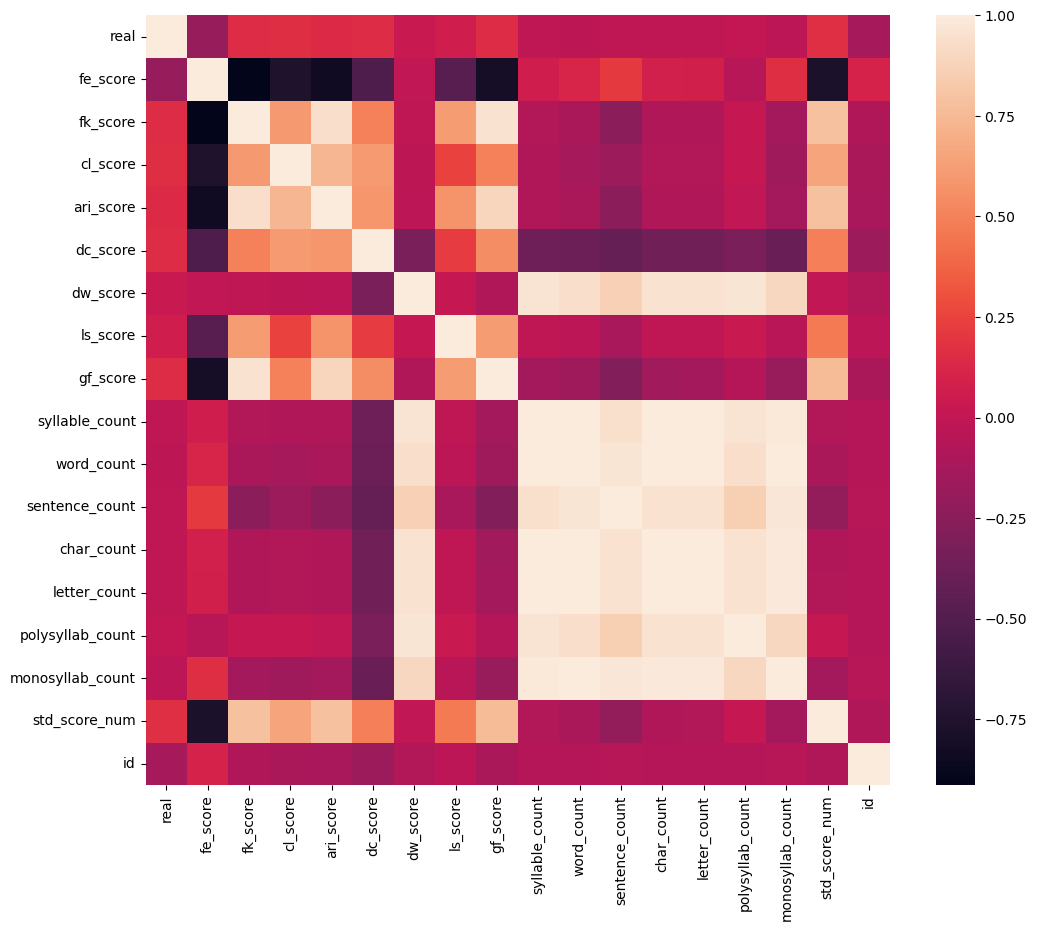

In [146]:
plt.subplots(figsize=(12,10))
sns.heatmap(News_df.corr());

In [ ]:
'''
Of the test the Flesch Ease of Reading score seems to be the best predictor of whether it is real news or not. 
'''

In [148]:
features = [feature for feature in News_df.columns if feature in column_names]

In [154]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'real', data=News_df, alpha=0.5)
        ax.set(xlabel=col, ylabel='real or fake')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

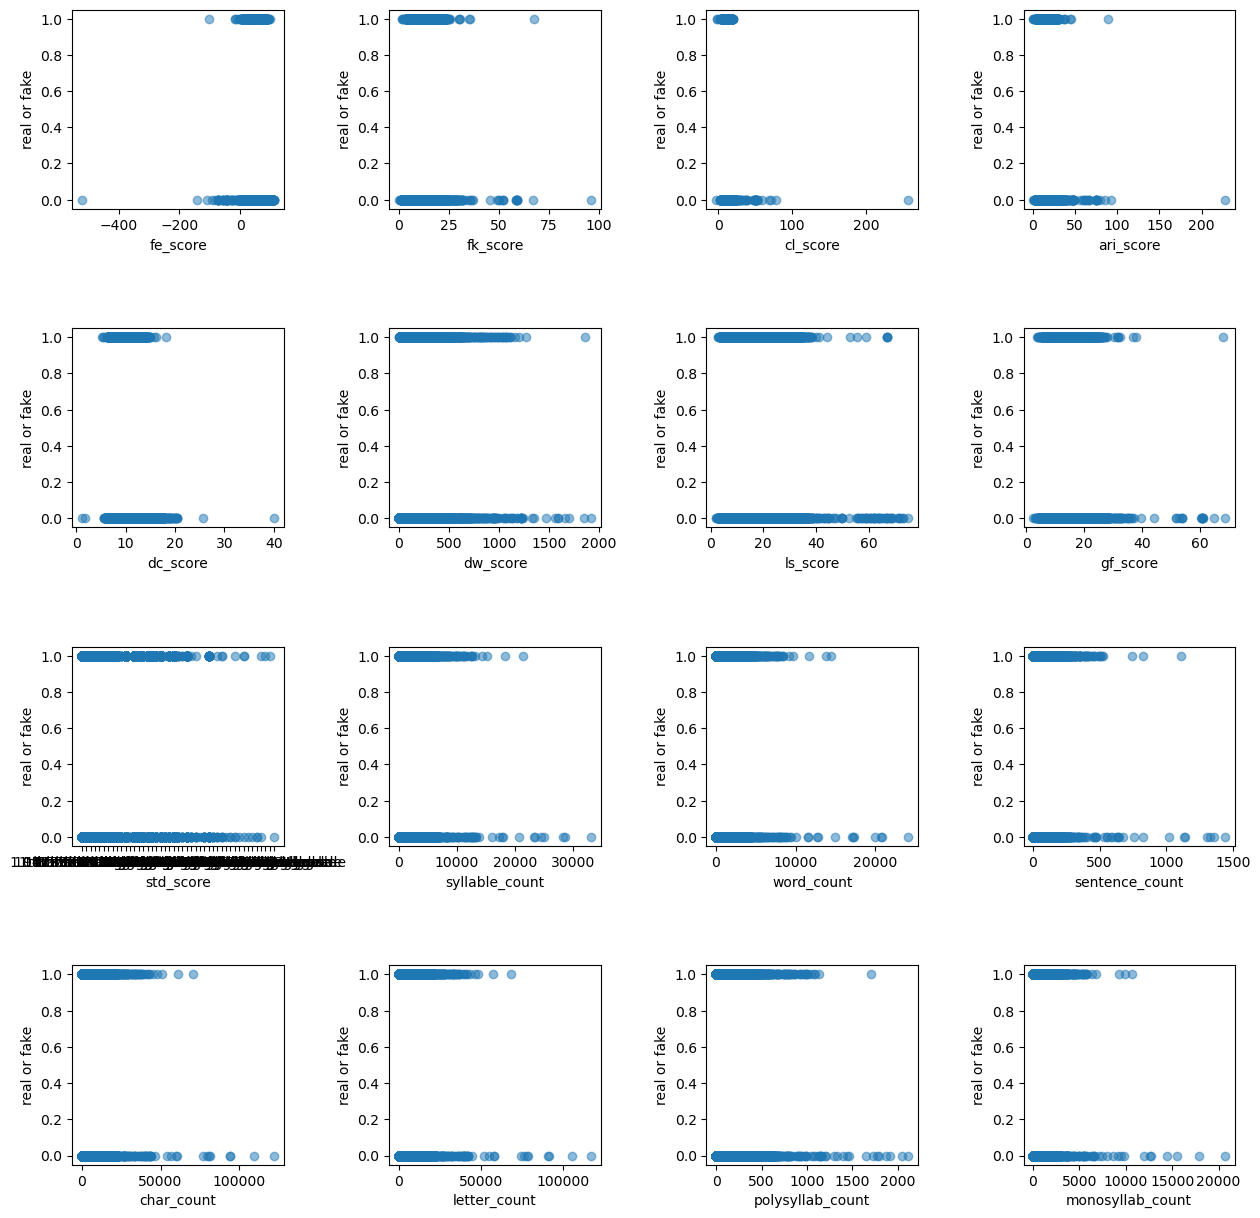

In [155]:
scatterplots(features, ncol=4, figsize=(15, 15))